In [1]:
# Jupyter notebook for testing deepforge library
# author: Fabrizio Romanelli
# email : fabrizio.romanelli@gmail.com
# date  : 04/10/2023

# Import the deepforge library
import deepforge as df

# Initialize the environment
df.initialize(CPU=20, GPU=1, VERBOSE='2', NPARRAYS=True)

2023-10-13 11:43:25.324540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 11:43:25.415564: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-13 11:43:27.188838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-13 11:43:27.192482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open f

In [ ]:
# Simple Deep Neural Network example
import numpy as np

# Make an instance of a multivariate DNN
mDnn = df.multivariateDNN(name="Simple DNN", inputN=1)

# Set inputs, inner layers and out layers
mDnn.setInputs([{'shape': (2,), 'name': 'Input layer'}])
mDnn.setLayers([[{'units': 16, 'activation': 'elu'}, {'units': 16, 'activation': 'elu'}, {'units': 16, 'activation': 'elu'}, {'units': 3, 'activation': 'linear'}]])
mDnn.setOutLayers([{'units': 1, 'activation': 'linear'}])

# Configure the model
mDnn.setModelConfiguration(optimizer='adam', loss='mse')

# Build the model and print the summary
mDnn.build()
mDnn.summary()

# Train the model
x1 = np.array([2,3,5,6,7], dtype=np.float32)
x2 = np.array([1,2,4,5,6], dtype=np.float32)
X1 = np.array([x1,x2], dtype=np.float32).T
y  = np.array([3,4,6,7,8], dtype=np.float32)

mDnn.fit(x=[X1], y=y, epochs=20, shuffle=True, verbose=0)

# Save the model
mDnn.save('simpleDNN',tflite=False)

# Make a prediction with the model
x1 = np.array([8], dtype=np.float32)
x2 = np.array([7], dtype=np.float32)
X1 = np.array([x1,x2], dtype=np.float32).T
y = mDnn.predict([X1])
print(y.numpy())

# Load the model
mDnnCopy = df.multivariateDNN(name="simple DNN 2")
mDnnCopy.load("simpleDNN")

In [ ]:
# Deep Neural Network with 2 input layers and custom loss function example
import numpy as np
from keras.losses import MeanSquaredError

# Define a custom loss function
def custom_loss(y_true, y_pred):
  mse = MeanSquaredError()
  return mse(y_true, y_pred)

# Make an instance of a multivariate DNN
mDnn2 = df.multivariateDNN(name="multivariate DNN", inputN=2)

# Set inputs, inner layers and out layers
mDnn2.setInputs([{'shape': (2,), 'name': 'inputLayer1'}, {'shape': (2,), 'name': 'inputLayer2'}])

innerLayers = [[{'units': 32, 'activation': 'elu'}, {'units': 16, 'activation': 'elu'}, {'units': 8, 'activation': 'elu'}, {'units': 3, 'activation': 'linear'}]]
innerLayers.append([{'units': 32, 'activation': 'elu'}, {'units': 16, 'activation': 'elu'}, {'units': 8, 'activation': 'elu'}, {'units': 3, 'activation': 'linear'}])
mDnn2.setLayers(innerLayers)

outputLayers = [{'units': 32, 'activation': 'elu'}, {'units': 1, 'activation': 'linear'}]
mDnn2.setOutLayers(outputLayers)

# Configure the model
mDnn2.setModelConfiguration(optimizer='adam', loss=custom_loss)

# Build the model and print the summary
mDnn2.build()
mDnn2.summary()

# Train the model
x1 = np.array([0.2,0.3,0.5,0.6,0.7], dtype=np.float32)
x2 = np.array([1.1,1.2,1.4,1.5,1.6], dtype=np.float32)
X1 = np.array([x1,x2], dtype=np.float32).T
x3 = np.array([0.2,0.3,0.5,0.6,0.7], dtype=np.float32)
x4 = np.array([1.1,1.2,1.4,1.5,1.6], dtype=np.float32)
X2 = np.array([x3,x4], dtype=np.float32).T
y  = np.array([3.0,4.0,6.0,7.0,8.0], dtype=np.float32)

mDnn2.fit(x=[X1,X2], y=y, epochs=50, shuffle=True, verbose=0)

# Save the model
mDnn2.save('multivariateDNN',tflite=False)

# Make a prediction with the model
x1 = np.array([0.4], dtype=np.float32)
x2 = np.array([1.3], dtype=np.float32)
X1 = np.array([x1,x2], dtype=np.float32).T
x3 = np.array([0.4], dtype=np.float32)
x4 = np.array([1.3], dtype=np.float32)
X2 = np.array([x3,x4], dtype=np.float32).T
y = mDnn2.predict([X1,X2])
print(y.numpy())

# Load the model with the custom loss function
mDnn2Copy = df.multivariateDNN(name="multivariate DNN 2")
mDnn2Copy.load("multivariateDNN", custom_objects = {'custom_loss': custom_loss})

In [ ]:
# Convolutional Neural Network example with MNIST dataset training and validation

from keras.datasets import mnist
from keras.utils import to_categorical

# Make an instance of a CNN
cnn = df.CNN(name="Simple CNN", inputN=1)

# Set inputs, inner layers and out layers
cnn.setInputs([{'shape': (28, 28, 1), 'name': 'Input Layer'}])
cnn.setConvLayers([[{'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'},{'filters': 64, 'kernel_size': (3, 3), 'activation': 'relu'},{'filters': 64, 'kernel_size': (3, 3), 'activation': 'relu'}]])
cnn.setPoolLayers([[{'pool_size': (2,2)},{'pool_size': (2,2)}]])
cnn.setOutLayers([{'units': 64, 'activation': 'relu'},{'units': 10, 'activation': 'softmax'}])

# Configure the model
cnn.setModelConfiguration(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model and print the summary
cnn.build()
cnn.summary()

# Load the MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Fit the model
cnn.fit(x=train_images, y=train_labels, epochs=5, batch_size=64)

# Save the model
cnn.save('CNN',tflite=False)

# Get the Keras model and run a test to evaluate accuracy
cnnModel = cnn.getModel()

test_loss, test_acc = cnnModel.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

In [ ]:
# Recurrent Neural Network examples

# Make an instance of a RNN
rnn = df.RNN(name="Simple RNN", inputN=1)

# Set inputs, inner layers and out layers
rnn.setInputs([{'shape': (1,2), 'name': 'Input layer'}])
rnn.setRecurrentLayers([[{'units': 500}]])
rnn.setOutLayers([{'units': 1, 'activation': 'linear'}])

# Configure the model
rnn.setModelConfiguration(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model and print the summary
rnn.build()
rnn.summary()

################################################
################################################
################################################

# Another RNN example with 3 stacked LSTM layers
rnn2 = df.RNN(name="Stacked RNN")

# Set inputs, inner layers and out layers
rnn2.setInputs([{'shape': (6,2), 'name': 'Input layer'}])
rnn2.setRecurrentLayers([[{'units': 500, 'return_sequences': True},{'units': 500, 'return_sequences': True},{'units': 500}]])
rnn2.setOutLayers([{'units': 1, 'activation': 'linear'}])

# Configure the model
rnn2.setModelConfiguration(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model and print the summary
rnn2.build()
rnn2.summary()

In [ ]:
# Convolutional Recurrent Neural Network example

# Make an instance of a CRNN
crnn = df.CRNN(name="Simple CRNN", inputN=1)

# Set inputs, inner layers and out layers
crnn.setInputs([{'shape': (3,3,1), 'name': 'Input Layer'}])
crnn.setConvLayers([[{'filters': 32, 'kernel_size': (2,2), 'activation': 'relu'},{'filters': 64, 'kernel_size': (2,2), 'activation': 'relu', 'padding': 'same'}]])
crnn.setPoolLayers([[{'pool_size': (2,2)},{'pool_size': (2,2)}]])
crnn.setRecurrentLayers([{'units': 500}])
crnn.setOutLayers([{'units': 1, 'activation': 'linear'}])

# Configure the model
crnn.setModelConfiguration(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model and print the summary
crnn.build()
crnn.summary()

# Save the model
crnn.save('CRNN')

[DF] Building model...
[DF] Model built!
Model: "SimpleDAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 


 dense_5 (Dense)             (None, 100)               5100      
                                                                 
Total params: 10,150
Trainable params: 10,150
Non-trainable params: 0
_________________________________________________________________


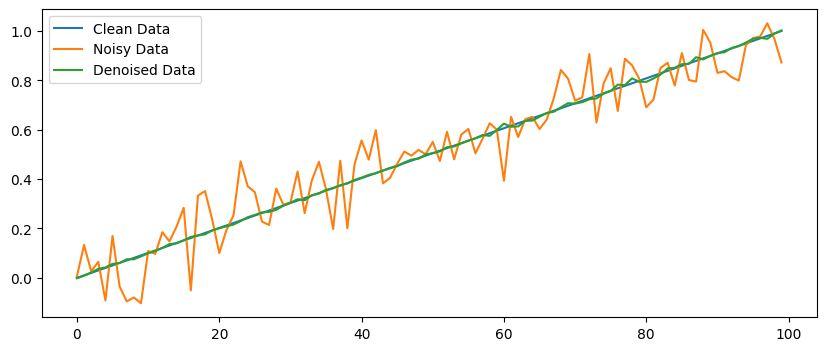

[DF] Saving model...
[DF] Model saved!


In [4]:
# Denoising AutoEncoder example
import numpy as np
import matplotlib.pyplot as plt

# Make an instance of a DAE
dae = df.DAE(name="Simple DAE")

# Set the number of inputs/outputs
inOutNum = 100

# Set inputs, inner layers and out layers
dae.setEncoderLayer({'shape': (inOutNum,)})
dae.setHiddenLayers([{'units': round(inOutNum/2), 'activation': 'relu'}])
dae.setDecoderLayer({'units': inOutNum, 'activation': 'linear'})

# # Configure the model
dae.setModelConfiguration(optimizer='adam', loss='mse')

# Build the model and print the summary
dae.build()
dae.summary()

# Generate some noisy data
def generate_noisy_data():
  y = np.linspace(0, 1, inOutNum)
  x = y + np.random.normal(0, 0.1, inOutNum)
  return x, y

x, y = generate_noisy_data()

x = x.reshape(1,inOutNum)
y = y.reshape(1,inOutNum)

# Train the model
dae.fit(x=[x], y=y, epochs=100, verbose=0)

# Test the denoising autoencoder
yHat = dae.predict(x)

# Visualize the results
plt.figure(figsize=(10, 4))
plt.plot(y.reshape(inOutNum,), label='Clean Data')
plt.plot(x.reshape(inOutNum,), label='Noisy Data')
plt.plot(yHat.reshape(inOutNum,), label='Denoised Data')
plt.legend()
plt.show()

# Save the model
dae.save('DAE')